## Chapter 5

40. (任意の)回帰モデルをscikit-learn準拠でコーディングし, 実験せよ.
	- MyRegression()クラスに必要なメソッド等を記述せよ.
	- データは[`X_train.csv`](./data/X_train.csv)と[`y_train.csv`](./data/y_train.csv)を用いよ.
	- 評価は[`X_test.csv`](./data/X_test.csv)で行う. 予測結果を`../text/data/y_pred.csv`として保存せよ.
    - 重回帰分析でもOK

In [1]:
import sklearn
print(sklearn.__version__)
import matplotlib.pyplot as plt
%matplotlib inline

0.24.0


In [2]:
import pandas as pd
temp = pd.read_csv("./data/X_train.csv", sep=",") # sepは区切り文字の指定
temp.head()

,平均気温,最高気温,最低気温,降水量の合計,平均風速,最大風速,最多風向,最大瞬間風速,平均蒸気圧,平均湿度,最小相対湿度,平均現地気圧,平均海面気圧,最低海面気圧
0,22.4,23.6,20.3,0.0,2.8,5.0,北東,7.6,18.3,67,56,1013.9,1016.7,1015.2
1,18.2,21.3,14.9,6.5,2.8,5.3,北北東,9.8,16.2,78,63,1016.9,1019.8,1017.5
2,25.8,31.1,22.3,0.0,2.7,5.3,東北東,10.4,25.9,79,52,1006.5,1009.3,1004.7
3,18.4,23.0,16.2,0.0,2.8,5.2,東北東,9.4,16.7,80,53,1018.5,1021.4,1017.5
4,25.7,29.6,23.0,0.0,1.8,3.5,北北東,5.6,26.6,81,64,1015.6,1018.4,1016.7


In [27]:
Y = pd.read_csv("./data/y_train.csv", sep=",") # sepは区切り文字の指定
Y.head(10)

,0.0
0,0.0
1,10.6
2,2.6
3,0.5
4,10.1
5,6.1
6,0.4
7,1.2
8,0.1
9,10.6


In [4]:
X = temp
X = X.drop("最多風向", 1)
X = X.drop(27)
X.head()

,平均気温,最高気温,最低気温,降水量の合計,平均風速,最大風速,最大瞬間風速,平均蒸気圧,平均湿度,最小相対湿度,平均現地気圧,平均海面気圧,最低海面気圧
0,22.4,23.6,20.3,0.0,2.8,5.0,7.6,18.3,67,56,1013.9,1016.7,1015.2
1,18.2,21.3,14.9,6.5,2.8,5.3,9.8,16.2,78,63,1016.9,1019.8,1017.5
2,25.8,31.1,22.3,0.0,2.7,5.3,10.4,25.9,79,52,1006.5,1009.3,1004.7
3,18.4,23.0,16.2,0.0,2.8,5.2,9.4,16.7,80,53,1018.5,1021.4,1017.5
4,25.7,29.6,23.0,0.0,1.8,3.5,5.6,26.6,81,64,1015.6,1018.4,1016.7


In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   平均気温    27 non-null     float64
 1   最高気温    27 non-null     float64
 2   最低気温    27 non-null     float64
 3   降水量の合計  27 non-null     float64
 4   平均風速    27 non-null     float64
 5   最大風速    27 non-null     float64
 6   最大瞬間風速  27 non-null     float64
 7   平均蒸気圧   27 non-null     float64
 8   平均湿度    27 non-null     int64  
 9   最小相対湿度  27 non-null     int64  
 10  平均現地気圧  27 non-null     float64
 11  平均海面気圧  27 non-null     float64
 12  最低海面気圧  27 non-null     float64
dtypes: float64(11), int64(2)
memory usage: 3.0 KB


X = X - X.mean()
Y = Y - Y.mean()

In [5]:
# データの分割
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

In [6]:
#線形回帰モデル
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#学習はfit
model.fit(X_train, Y_train)

LinearRegression()

In [7]:
Y_pred = model.predict(X_test)

In [8]:
print(Y_test[:5])
print("\n")
print(Y_pred[:5])

    0.0
2   2.6
24  1.6
14  0.0
17  1.0
5   6.1


[[ -3.69299211]
 [  4.20947582]
 [  2.07067646]
 [-15.77041126]
 [  1.76024462]]


In [21]:
# 回帰係数
print("係数: ", model.coef_)
 
# 切片
print("切片: ", model.intercept_)
 
# 決定係数
print("決定係数: ", model.score(X_train, Y_train))

係数:  [[-15.20515551  -1.20633782   5.39914633   0.21537204  -8.41721566
    6.08042727  -2.53421907   9.15563644  -1.68554228  -0.47136621
   -0.88081182   0.67757755   0.19637968]]
切片:  [248.46556286]
決定係数:  1.0


In [25]:
# 平均二乗誤差 (MSE)
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, model.predict(X_test))

240.84284027435345

<ipython-input-17-b2c56099ca6e>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


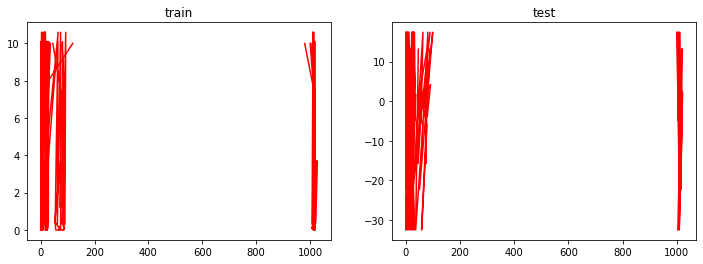

In [17]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

# axes[0].scatter(X_train, Y_train, marker=".")
axes[0].plot(X_train, model.predict(X_train), color="red")
axes[0].set_title("train")

# axes[1].scatter(X_test, Y_test, marker=".")
axes[1].plot(X_test, model.predict(X_test), color="red")
axes[1].set_title("test")
fig.show()

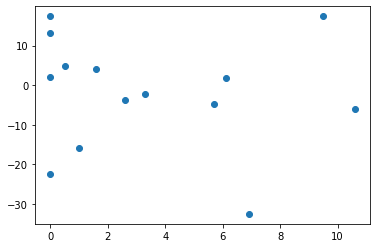

In [11]:
plt.scatter(Y_test, Y_pred)

In [12]:
#トレーニングに使用したデータセットでの精度
model.score(X_train,Y_train)

1.0

In [13]:
#テストに使用したデータセットでの精度
model.score(X_test,Y_test)

-17.923862566055163

In [14]:
from sklearn.utils.estimator_checks import check_estimator
check_estimator(model)

In [ ]:
# モデル構築のためのインポート
from sklearn.linear_model import Ridge